# Recycling - where to? 

Introductory text

Information about how to recycle in [Madrid](https://www.comunidad.madrid/servicios/consumo/reciclaje-donde-tirar-cada-producto)


# Image classification

## Train-test split

**Useful information**
- [shutil](https://docs.python.org/3/library/shutil.html)
    - `shutil.move()`[info](https://www.geeksforgeeks.org/python-shutil-move-method/)
    - `shutil.copy()`[info](https://www.geeksforgeeks.org/python-shutil-copy-method/)
- [os](https://docs.python.org/3/library/os.html#module-os)

In [1]:
import os
import numpy as np

In [ ]:

# STEP-1 : MAKING DIRECTORY (make output directory then makes train, test and val directory inside output directory)
os.makedirs('../Data/clean/output')
os.makedirs('../Data/clean/output/train')
os.makedirs('../Data/clean/output/test')

os.listdir('../Data/clean/output')

In [22]:
root_dir = '../Data/clean'
classes = ['glass', 'organic', 'paper', 'recycling_point', 'yellow']


In [37]:
# STEP-2 : SPLITTING THE DATASET (splitting of dataset based on targets and ratios and transferring them to output directory)

import shutil
import random
import math

root_dir = '../Data/clean'
classes = ['glass', 'organic', 'paper', 'recycling_point', 'yellow']
files = []
for clss in classes:
    print('------------' + clss + '-------------')
    dirtry = root_dir + '/' + clss
    print(dirtry)
    files = os.listdir(dirtry)
    #files.extend(os.listdir(dirtry))
    np.random.shuffle(files)
    base_outdir = '../Data/clean/output/'

    for folder in ['train', 'test']:
        target_dir = base_outdir + folder
        os.makedirs(target_dir + '/' + clss)
        target_class = target_dir + '/' + clss

        if folder == 'train':
            images_to_pass = files[: math.floor(0.8*len(files))]
            for img in images_to_pass:
                img = dirtry + '/' + img
                shutil.copy(img, target_class)
        else:
            images_to_pass = files[math.floor(0.8*len(files)):]
            for img in images_to_pass:
                img = dirtry + '/' + img
                shutil.copy(img, target_class)

------------glass-------------
../Data/clean/glass
------------organic-------------
../Data/clean/organic
------------paper-------------
../Data/clean/paper
------------recycling_point-------------
../Data/clean/recycling_point
------------yellow-------------
../Data/clean/yellow


In [20]:
len(files)

12327

In [41]:
# STEP-3 : CHECKING THE FILE SIZE (checking if the file split was perfect)

#val_sum = 0
#for flowr in os.listdir('./output/val'):
 #   lnk = './output/val/' + flowr
  #  val_sum += len(os.listdir(lnk))

train_sum = 0
for flowr in os.listdir('../Data/clean/output/train'):
    lnk = '../Data/clean/output/train/' + flowr
    train_sum += len(os.listdir(lnk))

test_sum = 0
for flowr in os.listdir('../Data/clean/output/test'):
    lnk = '../Data/clean/output/test/' + flowr
    test_sum += len(os.listdir(lnk))

#print(val_sum)
print('Number of images in the TRAIN set',train_sum, 'Proportion of the total:', train_sum/(train_sum+test_sum))
print()
print('Number of images in the TEST',test_sum, 'Proportion of the total:', test_sum/(train_sum+test_sum))
print()
print('Total number of images',train_sum+test_sum)

Number of images in the TRAIN set 9861 Proportion of the total: 0.7999513263567778

Number of images in the TEST 2466 Proportion of the total: 0.2000486736432222

Total number of images 12327


## Importing and visualising data
- Info on `os.walk` in [GeeksForGeeks](https://www.geeksforgeeks.org/os-walk-python/)
- For library `cv2`: [Opencv-python](https://pypi.org/project/opencv-python/)

In [2]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os

# check file paths based on a given folder, in this case "Data/clean"
for dirname, _, _ in os.walk('../Data/clean'):
    print(dirname)

../Data/clean
../Data/clean\glass
../Data/clean\organic
../Data/clean\output
../Data/clean\output\test
../Data/clean\output\test\glass
../Data/clean\output\test\organic
../Data/clean\output\test\paper
../Data/clean\output\test\recycling_point
../Data/clean\output\test\yellow
../Data/clean\output\train
../Data/clean\output\train\glass
../Data/clean\output\train\organic
../Data/clean\output\train\paper
../Data/clean\output\train\recycling_point
../Data/clean\output\train\yellow
../Data/clean\paper
../Data/clean\recycling_point
../Data/clean\yellow


In [3]:
train_path = "../Data/clean/output/train/"
test_path = "../Data/clean/output/test/"

In [4]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob

In [24]:
#class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {classes:i for i, classes in enumerate(classes)}
class_names_label

{'glass': 0, 'organic': 1, 'paper': 2, 'recycling_point': 3, 'yellow': 4}

In [25]:
nb_classes = len(classes)

IMAGE_SIZE = (150, 150)

In [26]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = [train_path, test_path]
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [27]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading ../Data/clean/output/train/


100%|██████████| 2157/2157 [00:16<00:00, 128.42it/s]


Loading ../Data/clean/output/test/


100%|██████████| 540/540 [00:14<00:00, 36.23it/s]


In [ ]:
#d = dict(tweets=tweetlist, users=userlist)
#pandas.DataFrame({k : pandas.Series(v) for k, v in d.iteritems()})

In [5]:
x_data = [] 
y_data = [] 
image_size = (150,150)

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img_array, image_size)
        x_data.append(img_array) 
        y_data.append(category.split("\\")[-1])
images = np.array(x_data, dtype='float64')
labels = np.array(y_data)

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 2157/2157 [00:15<00:00, 142.16it/s]


In [6]:
images[1]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [7]:
labels[1]

'glass'

In [8]:
y_data[3]

'glass'

In [88]:
x_data[1]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [8]:
# shape of the dataframe of the training set
data.shape

(9861, 2)

In [9]:
data.head()

,image,label
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",glass
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",glass
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",glass
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",glass
4,"[[[173, 178, 172], [174, 179, 173], [176, 181,...",glass


In [10]:
# check number of images in each category/class
from collections import Counter
Counter(y_data)

Counter({'recycling_point': 2240,
         'yellow': 2157,
         'glass': 2004,
         'organic': 2000,
         'paper': 1460})

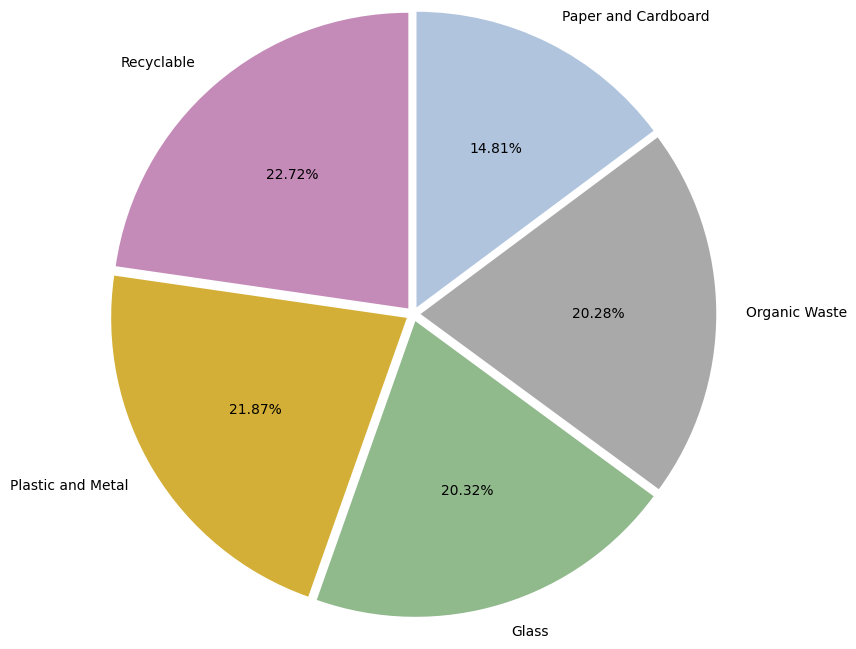

In [11]:
# plot the different categories
colors = ['#c48bb8','#D4AF37', '#90B98C', '#A9A9A9', '#B0C4DE']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05, 0.05,0.05, 0.05],autopct='%0.2f%%',
        labels=['Recyclable', 'Plastic and Metal', 'Glass', 'Organic Waste', 'Paper and Cardboard'], colors= colors,radius=2)
plt.show()

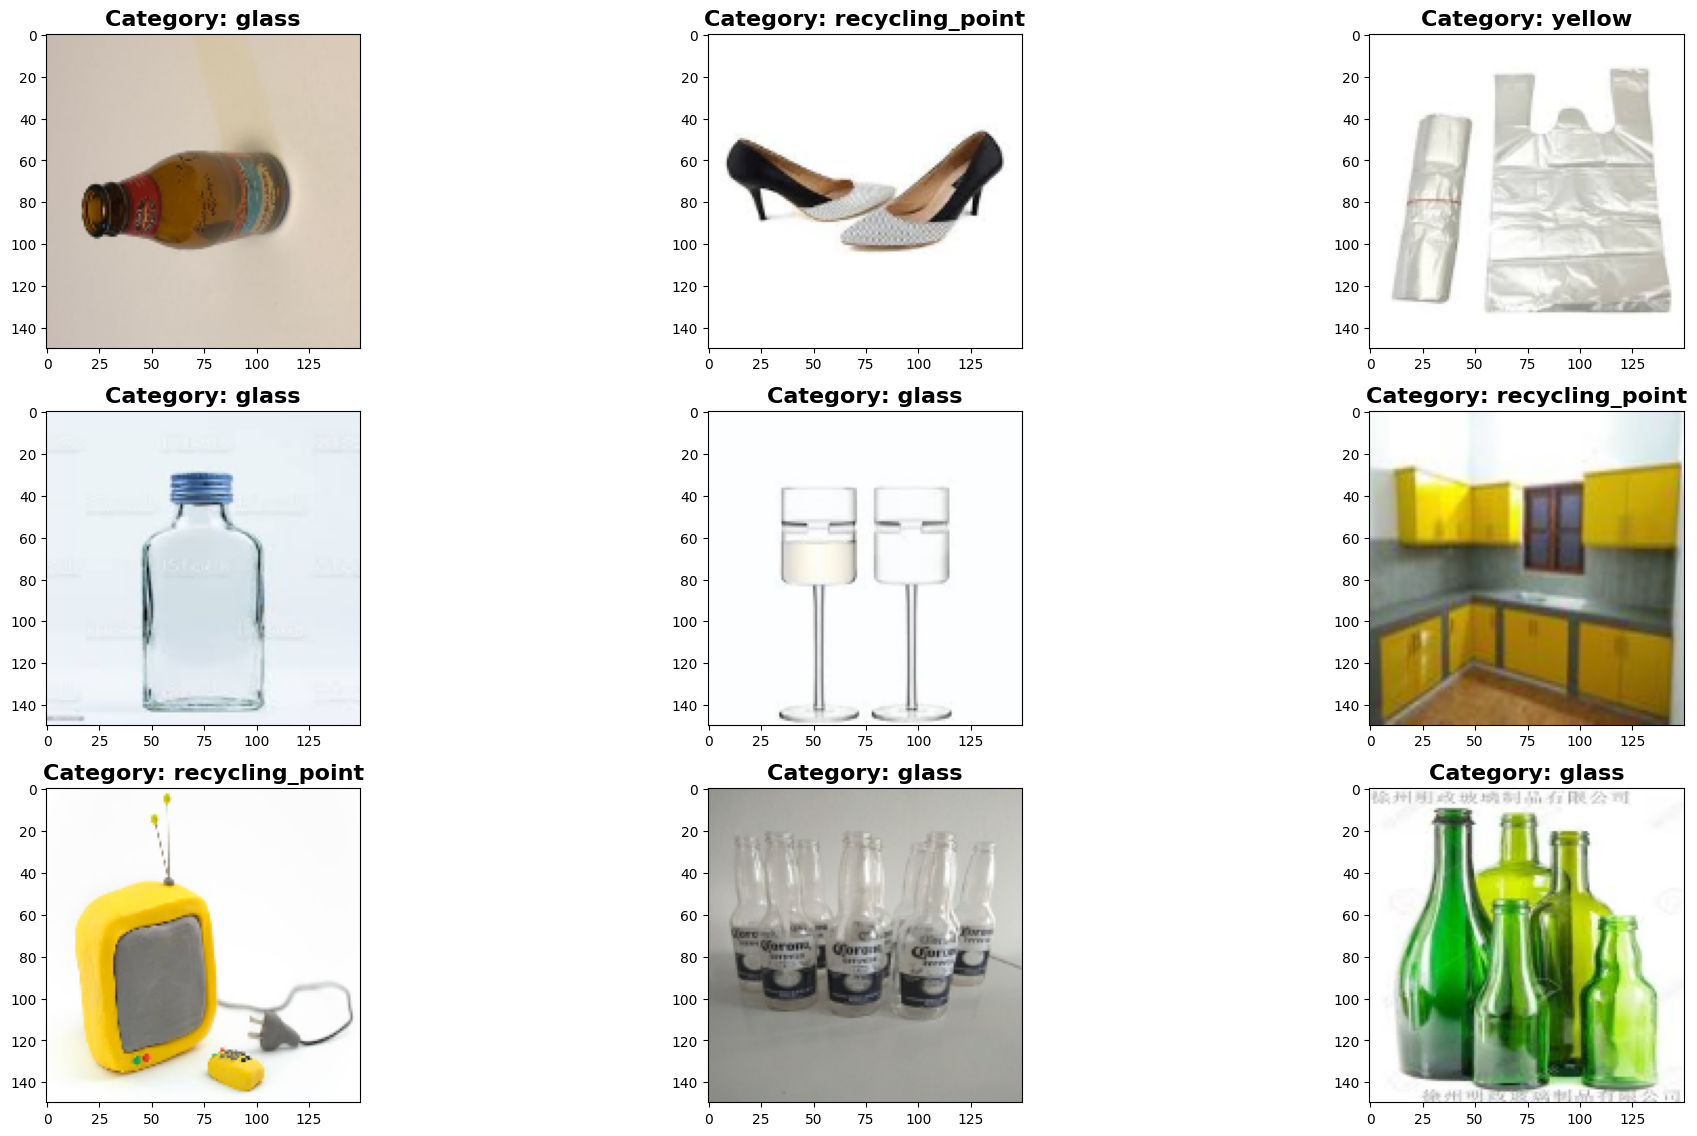

In [12]:
# the following plot gives us an idea of the type and size of a sample of the images in the training set
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(9861)
    plt.title('Category: {0}'.format(data.label[index]),fontdict={'size':16,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

## Model building
### Information about functions and classes
- **ImageDataGenerator** 
    - [Explanation here](https://pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/)
    - It accepts the original data, randomly transforms it, and returns only the new, transformed data.


- **Layers**
    - Convolutional
    - Activation
    - Pooling

    - Flatten: transforms the format of the images from a 2d-array to a 1d-array of 150 150 3 pixel values.
    - Dense
    - Activation (_'relu'_ - given a value x, returns max(x, 0) - and last layer _'softmax'_ - 6 neurons, probability that the image belongs to one of the classes-)

In [36]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),input_shape = (150,150,3), activation = 'relu'))
    #model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3), activation = 'relu'))  
    #model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3), activation = 'relu'))
    #model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    #model.add(Activation("relu"))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu') )
    #model.add(Activation("relu"))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation = 'softmax')) # output
    #model.add(Activation("sigmoid"))

    model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])
    return model

batch_size = 256

In [37]:
model = create_model()

In [38]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [39]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [23]:
# Image augmentation
train_datagen = ImageDataGenerator(rescale= 1./255)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 9861 images belonging to 5 classes.
Found 2466 images belonging to 5 classes.


In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint # This callback allows you to save the model (create checkpoints: it's a temp file that stores the neural network - just in case there's a problem so you don't have to start form scratch)

checkpoint_path = 'class-nn1.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5)

In [43]:
hist = model.fit(
        train_images,
        train_labels,
        epochs=10,
        batch_size=128,
        validation_split=0.2,
        verbose=2,
        callbacks=[early_stopping,checkpoint]
        )



Epoch 1/10

Epoch 1: saving model to class-nn1.hdf5
62/62 - 329s - loss: 13.8332 - accuracy: 0.4159 - val_loss: 2.3378 - val_accuracy: 0.0000e+00 - 329s/epoch - 5s/step
Epoch 2/10

Epoch 2: saving model to class-nn1.hdf5
62/62 - 517s - loss: 1.2144 - accuracy: 0.5264 - val_loss: 3.0477 - val_accuracy: 0.0000e+00 - 517s/epoch - 8s/step
Epoch 3/10

Epoch 3: saving model to class-nn1.hdf5
62/62 - 479s - loss: 1.1340 - accuracy: 0.5521 - val_loss: 3.1307 - val_accuracy: 0.0000e+00 - 479s/epoch - 8s/step
Epoch 4/10

Epoch 4: saving model to class-nn1.hdf5
62/62 - 394s - loss: 1.0542 - accuracy: 0.5809 - val_loss: 3.4863 - val_accuracy: 0.0000e+00 - 394s/epoch - 6s/step
Epoch 5/10

Epoch 5: saving model to class-nn1.hdf5
62/62 - 346s - loss: 0.9911 - accuracy: 0.6118 - val_loss: 3.5451 - val_accuracy: 0.0000e+00 - 346s/epoch - 6s/step
Epoch 6/10

Epoch 6: saving model to class-nn1.hdf5
62/62 - 330s - loss: 0.9474 - accuracy: 0.6422 - val_loss: 3.9599 - val_accuracy: 0.0000e+00 - 330s/epoch -

In [48]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

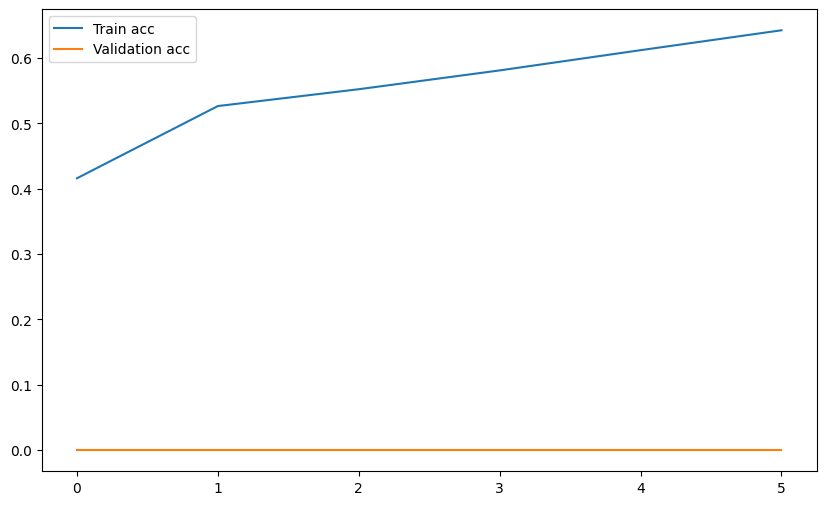

In [44]:


plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()



In [51]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("Accuracy: train vs validation")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("Loss: train vs validation")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

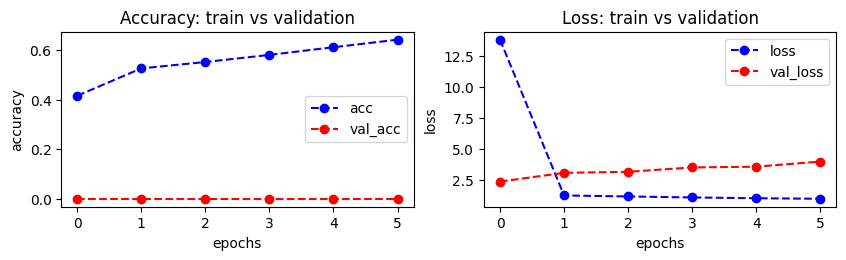

In [52]:
plot_accuracy_loss(hist)